<a href="https://colab.research.google.com/github/rosanavanesavasquez/Retail_DS/blob/main/ProyectoDS_ParteI_Retail_VASQUEZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
!ls '/content/gdrive/MyDrive/CODER HOUSE/DATA_SET'


retailDataSet  VideoGamesSales	winequality-red.csv


In [4]:
#Importo todas las librerias
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# archivo CSV
dataset_path = '/content/gdrive/MyDrive/CODER HOUSE/DATA_SET/retailDataSet/retail_data.csv'
df = pd.read_csv(dataset_path)


In [5]:
# Mostrar las columnas del dataset
print(df.columns)

Index(['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address',
       'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'Ratings', 'products'],
      dtype='object')


In [6]:
#Veo las primeras filas
print(df.head())


   Transaction_ID  Customer_ID                 Name                Email  \
0       8691788.0      37249.0  Michelle Harrington    Ebony39@gmail.com   
1       2174773.0      69749.0          Kelsey Hill     Mark36@gmail.com   
2       6679610.0      30192.0         Scott Jensen    Shane85@gmail.com   
3       7232460.0      62101.0        Joseph Miller     Mary34@gmail.com   
4       4983775.0      27901.0        Debra Coleman  Charles30@gmail.com   

          Phone                      Address        City            State  \
0  1.414787e+09            3959 Amanda Burgs    Dortmund           Berlin   
1  6.852900e+09           82072 Dawn Centers  Nottingham          England   
2  8.362160e+09            4133 Young Canyon     Geelong  New South Wales   
3  2.776752e+09  8148 Thomas Creek Suite 100    Edmonton          Ontario   
4  9.098268e+09    5813 Lori Ports Suite 269     Bristol          England   

   Zipcode    Country  ...  Total_Amount Product_Category  Product_Brand  \
0  7

In [7]:
# Resumen general del dataset
print(df.describe(include='all'))


        Transaction_ID    Customer_ID           Name                Email  \
count     3.016770e+05  301702.000000         301628               301663   
unique             NaN            NaN         159390                52897   
top                NaN            NaN  Michael Smith  Michael59@gmail.com   
freq               NaN            NaN            144                   93   
mean      5.495823e+06   55006.553934            NaN                  NaN   
std       2.595565e+06   26005.675200            NaN                  NaN   
min       1.000007e+06   10000.000000            NaN                  NaN   
25%       3.247930e+06   32469.250000            NaN                  NaN   
50%       5.499657e+06   55012.000000            NaN                  NaN   
75%       7.739509e+06   77511.000000            NaN                  NaN   
max       9.999995e+06   99999.000000            NaN                  NaN   

               Phone                 Address     City    State        Zipco

In [8]:
# Exploración inicial
print(df.head())
print(df.info())


   Transaction_ID  Customer_ID                 Name                Email  \
0       8691788.0      37249.0  Michelle Harrington    Ebony39@gmail.com   
1       2174773.0      69749.0          Kelsey Hill     Mark36@gmail.com   
2       6679610.0      30192.0         Scott Jensen    Shane85@gmail.com   
3       7232460.0      62101.0        Joseph Miller     Mary34@gmail.com   
4       4983775.0      27901.0        Debra Coleman  Charles30@gmail.com   

          Phone                      Address        City            State  \
0  1.414787e+09            3959 Amanda Burgs    Dortmund           Berlin   
1  6.852900e+09           82072 Dawn Centers  Nottingham          England   
2  8.362160e+09            4133 Young Canyon     Geelong  New South Wales   
3  2.776752e+09  8148 Thomas Creek Suite 100    Edmonton          Ontario   
4  9.098268e+09    5813 Lori Ports Suite 269     Bristol          England   

   Zipcode    Country  ...  Total_Amount Product_Category  Product_Brand  \
0  7

### Análisis de Valores Faltantes
El análisis inicial muestra que el monto total (`Total_Amount`) es crítico para el análisis, se optó por eliminar las filas que tienen valores nulos en esta columna. Para las demás columnas, se ha aplicado la técnica de rellenar valores faltantes con el valor más frecuente (moda), especialmente para columnas como `Country`, `Gender`, `Payment_Method`, y `Shipping_Method`.
Para columnas como `Name`, `Email`, y `Address`, que no son críticas para las preguntas planteadas, se han dejado con sus valores faltantes, ya que no afectan el análisis principal.

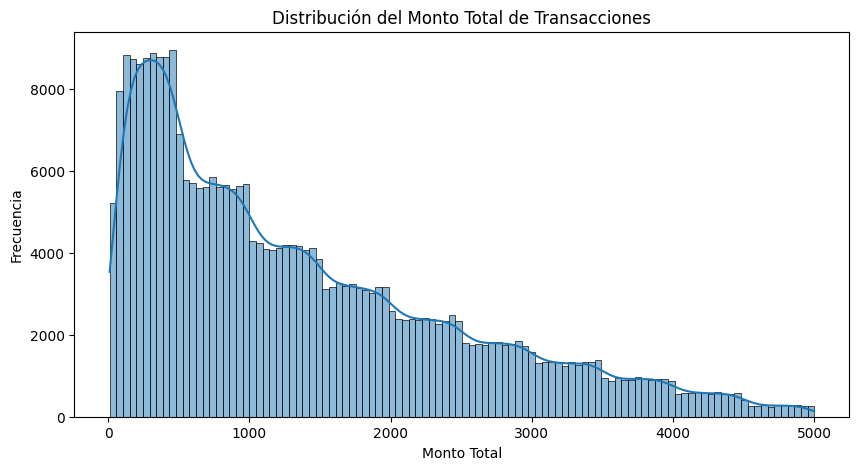

In [13]:
#Distribución del monto total de las transacciones
plt.figure(figsize=(10, 5))
sns.histplot(df['Total_Amount'], kde=True)
plt.title('Distribución del Monto Total de Transacciones')
plt.xlabel('Monto Total')
plt.ylabel('Frecuencia')
plt.show()


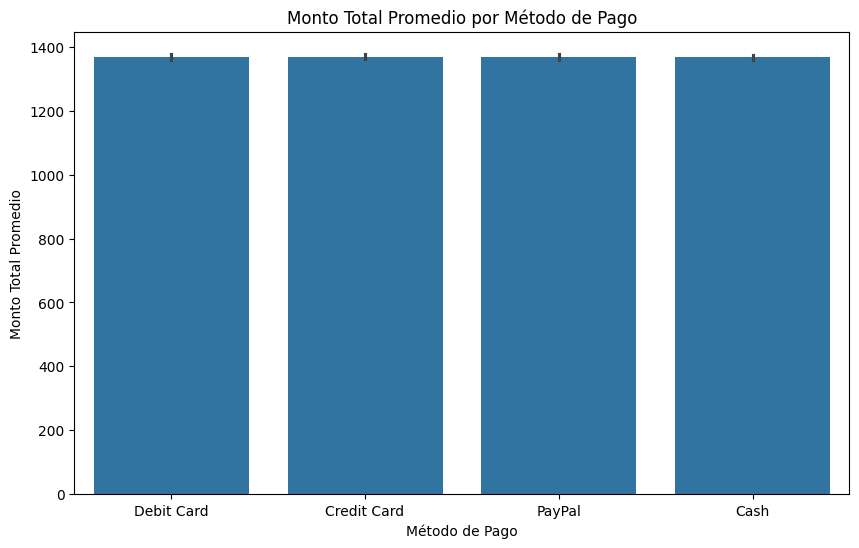

In [10]:
# Ventas por método de pago
plt.figure(figsize=(10, 6))
sns.barplot(x='Payment_Method', y='Total_Amount', data=df, estimator='mean')
plt.title('Monto Total Promedio por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Monto Total Promedio')
plt.show()

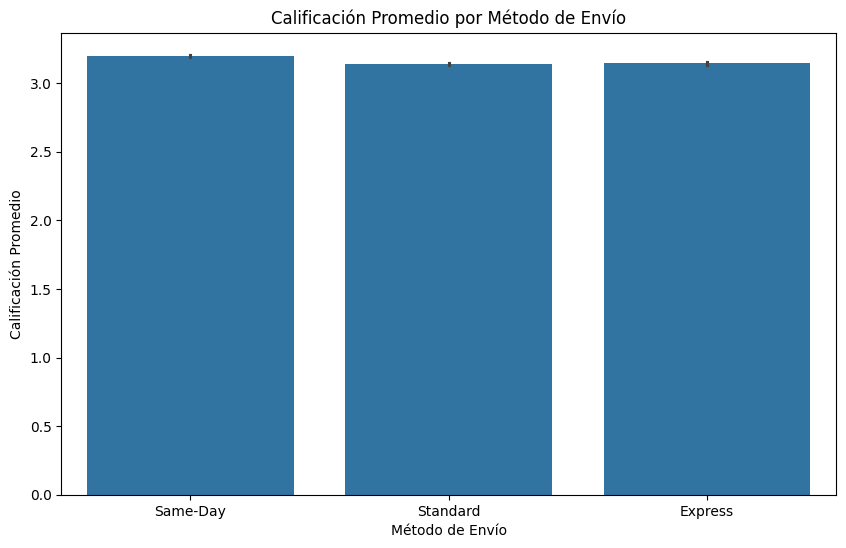

In [11]:
# Calificación promedio por método de envío
plt.figure(figsize=(10, 6))
sns.barplot(x='Shipping_Method', y='Ratings', data=df, estimator='mean')
plt.title('Calificación Promedio por Método de Envío')
plt.xlabel('Método de Envío')
plt.ylabel('Calificación Promedio')
plt.show()

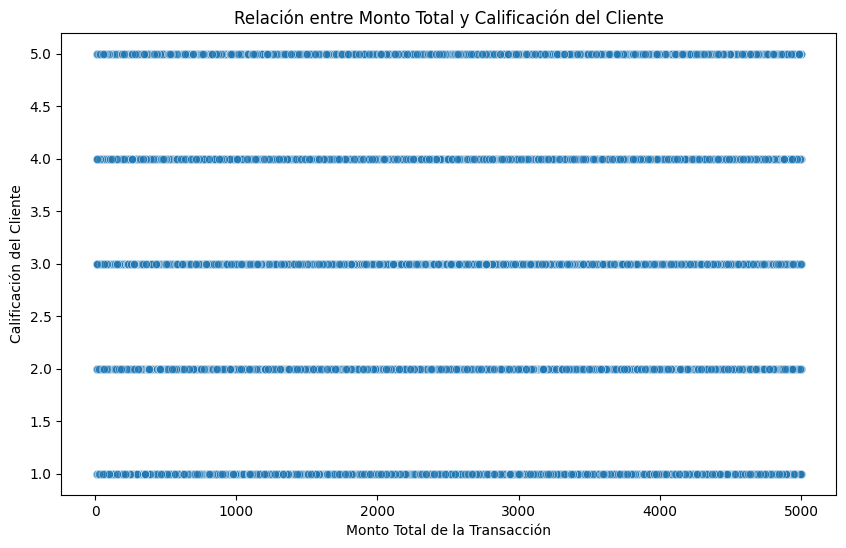

In [12]:
# Gráfico de dispersión 1: Relación entre Total_Amount y Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Amount', y='Ratings', data=df, alpha=0.6)
plt.title('Relación entre Monto Total y Calificación del Cliente')
plt.xlabel('Monto Total de la Transacción')
plt.ylabel('Calificación del Cliente')
plt.show()

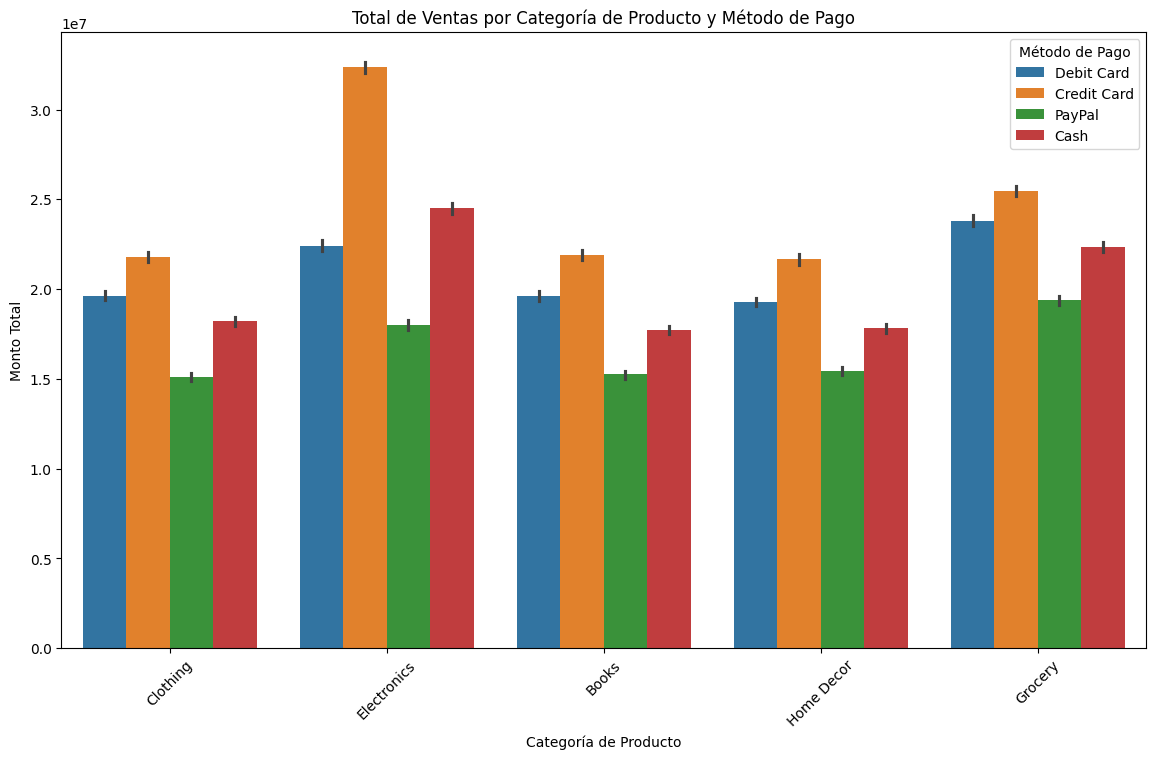

In [14]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Product_Category', y='Total_Amount', hue='Payment_Method', data=df, estimator='sum')
plt.title('Total de Ventas por Categoría de Producto y Método de Pago')
plt.xlabel('Categoría de Producto')
plt.ylabel('Monto Total')
plt.xticks(rotation=45)
plt.legend(title='Método de Pago')
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


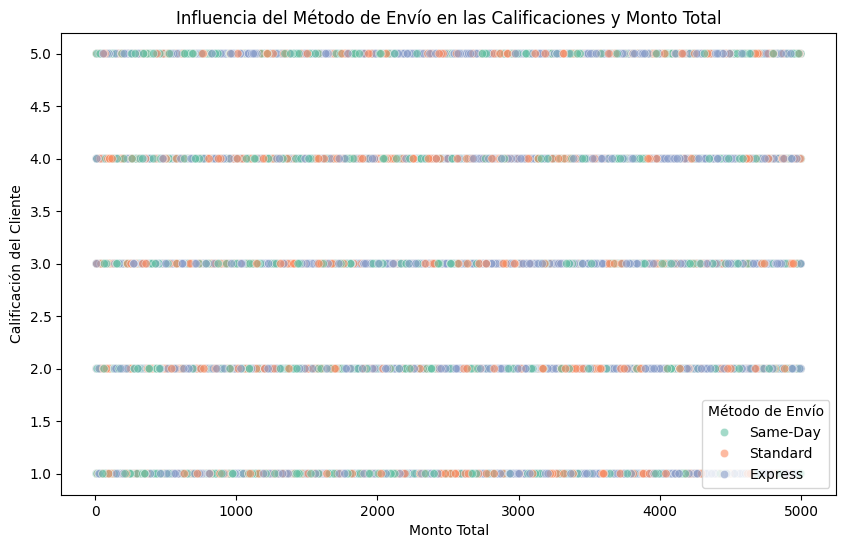

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Amount', y='Ratings', hue='Shipping_Method', data=df, alpha=0.6, palette='Set2')
plt.title('Influencia del Método de Envío en las Calificaciones y Monto Total')
plt.xlabel('Monto Total')
plt.ylabel('Calificación del Cliente')
plt.legend(title='Método de Envío')
plt.show()


El gráfico de dispersión no me permite interpretar  las variables ya que están muy distribuidas o hay muchos puntos que se superponen. En este caso, como las calificaciones son valores discretos y los montos tienen una amplia gama, la información se es tan clara con este gráfico.

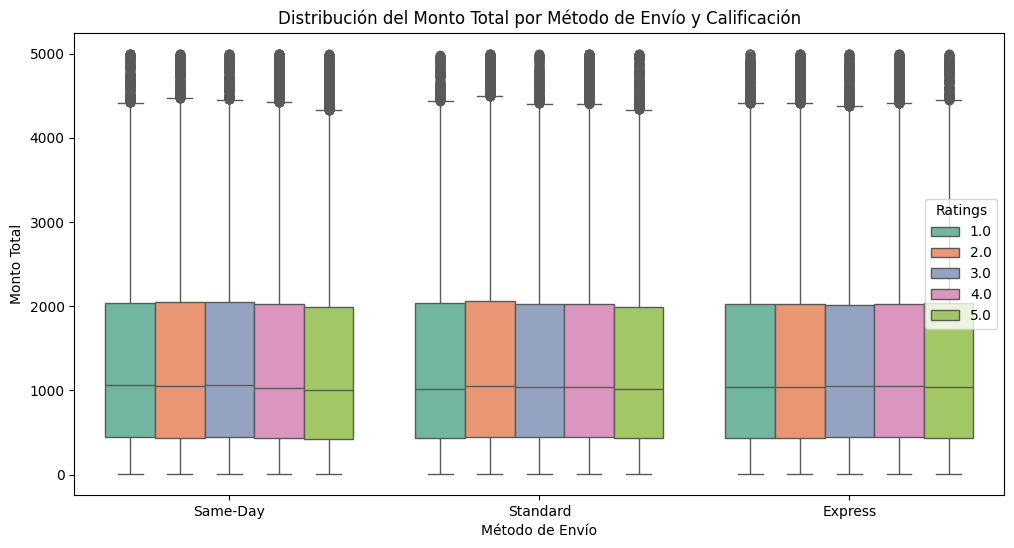

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Shipping_Method', y='Total_Amount', hue='Ratings', data=df, palette='Set2')
plt.title('Distribución del Monto Total por Método de Envío y Calificación')
plt.xlabel('Método de Envío')
plt.ylabel('Monto Total')
plt.show()


In [19]:
!git clone https://github.com/rosanavanesavasquez/Retail_DS.git

Cloning into 'Retail_DS'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), done.
Resolving deltas: 100% (1/1), done.
